In [1]:
def get_class_names_from_folder(directory):
  """
  Get the classnames from train folder for example
  """
  import pathlib
  import numpy as np
  data_dir = pathlib.Path(directory)
  class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class names 
  return class_names
  print(class_names)

In [3]:
class_names = get_class_names_from_folder(directory=r"datasets\archive (2)\kkanji\kkanji2")
print(class_names)
print(type(class_names))

['U+241C6' 'U+24FA3' 'U+25DA1' ... 'U+FA4A' 'U+FA55' 'U+FA5C']
<class 'numpy.ndarray'>


In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os
import random

In [5]:
def visualize_random_image(target_dir, target_class):
  """
  Visualises random image from exact directory
  """
  image_dir = target_dir + target_class
  random_image = random.sample(os.listdir(image_dir), 1)

  img = mpimg.imread(image_dir + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
visualize_random_image(r"datasets\archive (2)\kkanji\kkanji2\U+4C61", "U+24FA3")

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'datasets\\archive (2)\\kkanji\\kkanji2U+24FA3'

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)
val_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(directory=r"datasets\archive (2)\kkanji\kkanji2",
                                               target_size=(83, 84),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(directory=r"datasets\archive (2)\kkanji\kkanji2",
                                               target_size=(83, 84),
                                               batch_size=32,
                                               class_mode="categorical")

validation_data = val_datagen.flow_from_directory(directory=r"datasets\archive (2)\kkanji\kkanji2",
                                               target_size=(83, 84),
                                               batch_size=32,
                                               class_mode="categorical")

Found 140424 images belonging to 3832 classes.
Found 140424 images belonging to 3832 classes.
Found 140424 images belonging to 3832 classes.


In [102]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

In [107]:
# Create model
model = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(83, 84, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(53, activation="softmax")
])

# Compile the model
model.compile(loss="categorical_crossentropy",
              optimizer=Adam(),
              metrics=["accuracy"])

In [108]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 81, 82, 10)        280       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 40, 41, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 38, 39, 10)        910       
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 19, 19, 10)       0         
 g2D)                                                            
                                                                 
 flatten_15 (Flatten)        (None, 3610)              0         
                                                                 
 dense_15 (Dense)            (None, 53)              

In [109]:
history = model.fit(train_data,
                    batch_size=32,
                    epochs=15,
                    steps_per_epoch=len(train_data),
                    validation_data=validation_data,
                    validation_steps=len(validation_data))

Epoch 1/15
25/25 [==============================] - 3s 106ms/step - loss: 3.1403 - accuracy: 0.3262 - val_loss: 1.2522 - val_accuracy: 0.8600
Epoch 2/15
25/25 [==============================] - 1s 42ms/step - loss: 0.3641 - accuracy: 0.9200 - val_loss: 0.3404 - val_accuracy: 0.9000
Epoch 3/15
25/25 [==============================] - 1s 43ms/step - loss: 0.0745 - accuracy: 0.9762 - val_loss: 0.3837 - val_accuracy: 0.8800
Epoch 4/15
25/25 [==============================] - 1s 41ms/step - loss: 0.0294 - accuracy: 0.9912 - val_loss: 0.3928 - val_accuracy: 0.8600
Epoch 5/15
25/25 [==============================] - 1s 41ms/step - loss: 0.0153 - accuracy: 0.9912 - val_loss: 0.4360 - val_accuracy: 0.8700
Epoch 6/15
25/25 [==============================] - 1s 42ms/step - loss: 0.0080 - accuracy: 0.9975 - val_loss: 0.3054 - val_accuracy: 0.8900
Epoch 7/15
25/25 [==============================] - 1s 42ms/step - loss: 0.0048 - accuracy: 0.9987 - val_loss: 0.3096 - val_accuracy: 0.9100
Epoch 8/15
2

In [110]:
model.evaluate(test_data)

4/4 [==============================] - 0s 79ms/step - loss: 0.3425 - accuracy: 0.9200


[0.34254541993141174, 0.9200000166893005]

1/1 [==============================] - 0s 39ms/step


Text(0.5, 1.0, 'kanaO')

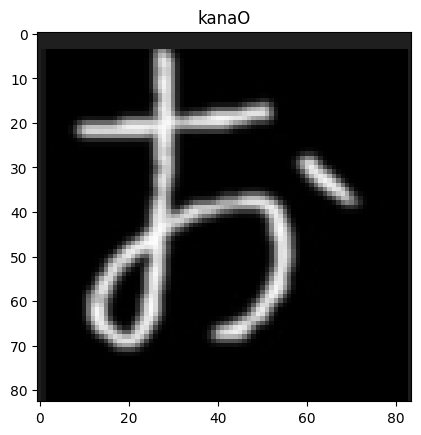

In [127]:
def load_and_resize_image(filename, size1, size2):

  # Load image
  img = tf.io.read_file(filename)
  
  # Compile image
  img = tf.image.decode_image(img)

  # Resize image
  img = tf.image.resize(img, [size1, size2])

  # Scale the tensor
  img = img / 255

  return img

image = load_and_resize_image("uploads/hhhh.png", 83,84)

image = image[:,:,:3]
pred = model.predict(tf.expand_dims(image, axis=0))
plt.imshow(image)
plt.title(class_names[pred[0].argmax()])

In [17]:

import pickle
  
# Save the trained model as a pickle string.
saved_model = pickle.dumps(model)

In [18]:
from joblib import Parallel, delayed
import joblib

In [20]:
joblib.dump(model, 'cnn_terrain_detection_18_09.pkl')
  
# Load the model from the file
knn_from_joblib = joblib.load('cnn_terrain_detection_18_09.pkl')

This is for running

In [3]:
from joblib import Parallel, delayed
import joblib
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [4]:
model = joblib.load('cnn_terrain_detection_18_09.pkl')

In [7]:
model.save('gfgModel.h5')

In [14]:
from tensorflow.keras.models import load_model
savedModel=load_model('gfgModel.h5')

1/1 [==============================] - 0s 272ms/step
[[0.0000000e+00 3.9669126e-09 8.6152831e-15 1.0000000e+00]]
0.0
3.9669126e-09
8.615283e-15
1.0


Text(0.5, 1.0, 'Sandy')

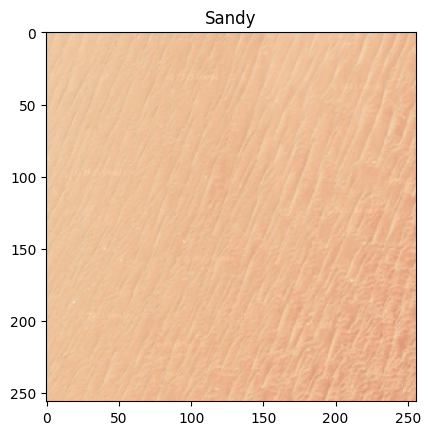

In [5]:
def load_and_resize_image(filename, size):

  # Load image
  img = tf.io.read_file(filename)
  
  # Compile image
  img = tf.image.decode_image(img)

  # Resize image
  img = tf.image.resize(img, [size, size])

  # Scale the tensor
  img = img / 255

  return img

image = load_and_resize_image("uploads/ss.png", 256)
image = image[:,:,:3]
pred = model.predict(tf.expand_dims(image, axis=0))
print(pred)
print(pred[0][0])
print(pred[0][1])


print(pred[0][2])
print(pred[0][3])
plt.imshow(image)
plt.title(class_names[pred[0].argmax()])

In [25]:
import pickle
filename="model.sav"
pickle.dump(model,open(filename,'wb'))